# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.107559e+01     9.160203e+00
 * time: 0.004636049270629883
     1     2.911228e+01     5.909911e+00
 * time: 0.013280868530273438
     2     1.698775e+01     3.465235e+00
 * time: 0.04271697998046875
     3     1.311604e+01     2.730705e+00
 * time: 0.06788206100463867
     4     1.223704e+01     1.588177e+00
 * time: 0.08533501625061035
     5     1.208761e+01     1.694066e+00
 * time: 0.10226297378540039
     6     1.101918e+01     2.600721e+00
 * time: 0.12049388885498047
     7     1.007585e+01     2.172766e+00
 * time: 0.13934803009033203
     8     9.381392e+00     1.166583e+00
 * time: 0.16002202033996582
     9     9.128432e+00     7.721040e-01
 * time: 0.18026089668273926
    10     8.986243e+00     4.151371e-01
 * time: 0.20160889625549316
    11     8.914125e+00     5.937707e-01
 * time: 0.21720004081726074
    12     8.879477e+00     7.211428e-01
 * time: 0.2324378490447998
    13     8.854906e+00     2.859950e-01
 * time

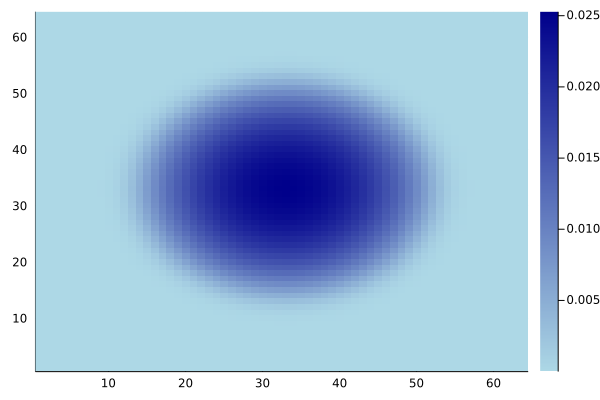

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)